<div style="padding:20px 20px 20px; 
            color:#004346;
            font-size:200%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 
<p style="font-weight: bold; text-align: center;">Тестовое задание №2 на позицию Data Scientist. Александр Син</p>

</div>


<div style="padding:20px 40px 30px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
        
__Постановка задачи:__ Провести кластеризацию клиентов, для оценки состояния базы. Описать полученные кластеры, в чем их особенность, выделить кластер “топовых” клиентов, объяснить его “топовость”.

__Заказчик:__ Отдел маркетинга, 4-5 пользователей с разной степенью погруженности.

__Вопросы, на которые заказчик хочет получить ответы:__
Команде маркетинга нужно понимать какие группы клиентов выделяются в их клиентской базе, например:
Сколько клиентов в “оттоке”, “пред-оттоке”.
Какие особенности имеются у активных клиентов, на какие группы они разделяются.
Характеристики топовых клиентов.
Итд
Подсказка: окончательное разбиение клиентов на кластеры нужно выполнить для их последнего месяца жизни (num).

    
__Описание данных:__ https://drive.google.com/file/d/1BDqGgQVZCX3ZqKUbHzM1wRORBjKFrQbI/view   
<ul>
<li> <b>quantity_lastyear: </b>
Количество выкупленных единиц товаров за 1 год от даты окончания i-ого периода</li>
<li> <b>orders_lastyear: </b>
Количество выкупленных заказов за 1 год от даты окончания i-ого периода
<li>  <b>orders_refund:  </b>
Количество выкупленных заказов, по которым был возврат после получения за 1 год от даты окончания i-ого периода
<li>  <b>ratio_not_dh: </b>
Отношение выкупа по стоимости от суммарной базовой стоимости выкупленных товаров за 1 год от даты окончания i-ого периода
<li> <b>ratio_online:  </b>
Доля заказов, оформленных онлайн, от общего числа оформленных заказов за 1 год от даты окончания i-ого периода
<li> <b>ratio_refund: </b>
Доля заказов, по которым был возврат, от общего числа выкупленных заказов за 1 год от даты окончания i-ого периода
<li> <b>avg_ratio_purchase: </b>
Среднее отношение за 1 год от даты окончания i-ого периода числа выкупленных товарных позиций к числу оформленных по онлайн-заказам, доставленным к пункту выдачи
<li> <b>quantity_1st_period: </b>
Количество выкупленных единиц товара за 1-ый период жизни пользователя
<li> <b>unigenders: </b>
Количество уникальных гендерных характеристик принадлежности товарных позиций по оформленным заказам за все время жизни пользователя от даты окончания i-ого периода
<li> <b>recency: </b>
Количество дней от даты последнего выкупленного заказа до даты окончания i-ого периода
<li> <b>aov: </b>
Средний чек по выкупленным заказам за 1 год от даты окончания i-ого периода
</ul>
</div>    

<div style="padding:0px 40px 30px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
<ul> <b>План</b>
<li>Изучим и предобработаем данные.</li> 
<li>Разделим исходные данные на обучающую и тестовую выборки.</li> 
<li>Проведем масштабирование и кодировку признаков.</li> 
<li>Проведем кластеризацию данных. </li>
<li>Опишем кластеры</li>
<li>Проведем кластеризацию данных в последнем и предпоследнем периоде </li>
<li>Проанализируем переток клиентов между кластерами </li>
<li>Выводы.</li> 
</ul>

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:100%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Загрузка библиотек

</div>

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:100%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Загрузка данных, EDA

</div>

In [2]:
df = pd.read_csv('D:/programs/projects/coffee/clustering_test_work.csv', index_col = 0, parse_dates=['period_end'])
df.info()
display(df.head(20))

<class 'pandas.core.frame.DataFrame'>
Index: 2247574 entries, 0 to 2247573
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   actual_id            int64         
 1   period_end           datetime64[ns]
 2   num                  int64         
 3   revenue_lastyear     float64       
 4   quantity_lastyear    int64         
 5   orders_lastyear      int64         
 6   orders_refund        int64         
 7   ratio_not_dh         float64       
 8   ratio_online         float64       
 9   ratio_refund         float64       
 10  avg_ratio_purchase   float64       
 11  quantity_1st_period  float64       
 12  unigenders           int64         
 13  recency              int64         
 14  aov                  float64       
dtypes: datetime64[ns](1), float64(7), int64(7)
memory usage: 274.4 MB


,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
0,12013601421,2021-02-19,2,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,123,17920.0
1,12013601421,2021-04-19,3,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,182,17920.0
2,12013601421,2021-06-19,4,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,243,17920.0
3,12013601421,2021-08-19,5,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,304,17920.0
4,12013601421,2021-10-19,6,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,365,17920.0
5,12013601421,2021-12-19,7,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,426,0.0
6,12013601421,2022-02-19,8,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,488,0.0
7,12013601421,2022-04-19,9,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,547,0.0
8,12013601421,2022-06-19,10,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,608,0.0
9,12013601421,2022-08-19,11,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,669,0.0


In [3]:
df.describe()

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
count,2.247574e+06,2247574,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06
mean,2.743856e+13,2022-04-29 00:40:04.051301888,6.089290e+00,3.099290e+04,3.321365e+00,2.006601e+00,1.232200e-01,7.761333e-01,2.389008e-01,3.704832e-02,9.649268e-01,2.289252e+00,1.038383e+00,2.396081e+02,1.187220e+04
min,6.380000e+02,2021-01-01 00:00:00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,7.912462e+10,2021-12-18 00:00:00,3.000000e+00,3.980000e+03,1.000000e+00,1.000000e+00,0.000000e+00,8.341633e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,3.480000e+03
50%,7.919928e+10,2022-06-01 00:00:00,6.000000e+00,1.398000e+04,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.840000e+02,9.980000e+03
75%,7.950406e+10,2022-10-13 00:00:00,8.000000e+00,3.492000e+04,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.630000e+02,1.624150e+04
max,4.415340e+18,2022-12-07 00:00:00,1.400000e+01,7.365842e+06,6.290000e+02,2.810000e+02,1.260000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.380000e+02,2.000000e+00,8.270000e+02,4.307900e+05
std,9.871432e+15,NaN,3.164263e+00,6.037296e+04,6.016230e+00,3.069162e+00,6.905141e-01,4.014436e-01,3.838896e-01,1.554406e-01,1.458924e-01,2.412920e+00,1.921185e-01,1.791003e+02,1.202568e+04


In [4]:
print(df.duplicated(subset=['actual_id', 'period_end']).sum())
print(df.duplicated().sum())

0
0


In [5]:
df.isnull().sum()

actual_id              0
period_end             0
num                    0
revenue_lastyear       0
quantity_lastyear      0
orders_lastyear        0
orders_refund          0
ratio_not_dh           0
ratio_online           0
ratio_refund           0
avg_ratio_purchase     0
quantity_1st_period    0
unigenders             0
recency                0
aov                    0
dtype: int64

In [6]:
df['period_end'].max()

Timestamp('2022-12-07 00:00:00')

In [7]:
df['period_end'].min()

Timestamp('2021-01-01 00:00:00')

In [8]:
df['num'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14], dtype=int64)

In [9]:
print(len(df['actual_id'].unique()))
print(df['actual_id'].unique().max())
print(df['actual_id'].unique().min())

302119
4415340079037244011
638


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 font-size: 120%;
                                                 width:80%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Промежуточные итоги: </b>
<ul>
<li> дубликатов и пропусков нет
<li> actual_id - идентификатор клиента
<li> всего клиентов 302119 человек
<li> num - количество месяцев жизни клиента
<li> период наблюдений составляет 2 года с начала 2021 года по конец 2022, разбитых по два месяца
<li> period_end - дата снятия отсчета, то есть если на 2022-02-19 снят отсчет и num=2, значит клиент был создан в январе 2022 года - декабре 2021

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:100%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Подготовка данных для обучения

</div>

In [10]:
df['unigenders'].unique()

array([1, 2], dtype=int64)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:120%; text-align:left">
Заменим значения в колонке unigenders на 0 и 1 для того, чтобы сделать этот признак категориальным

In [11]:
df['unigenders'] = df['unigenders'].apply( lambda x: 1 if x ==2 else 0 )

In [12]:
df['unigenders'].unique()

array([0, 1], dtype=int64)

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:90%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 
    
## Выделим данные за последний и предпоследний периоды

</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:120%; text-align:left">
Их будем кластеризовать в итоге.
</br>    Из последнего выделим отток и пред-отток.

In [13]:
max_num = df.groupby('actual_id').agg(
                            num=('num', "max")
                            )

In [14]:
last_per = max_num.merge(df, on=['actual_id', 'num'])

In [15]:
last_per['period_end'].unique()

<DatetimeArray>
['2022-12-07 00:00:00']
Length: 1, dtype: datetime64[ns]

In [16]:
last_per.info()
display(last_per.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302119 entries, 0 to 302118
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   actual_id            302119 non-null  int64         
 1   num                  302119 non-null  int64         
 2   period_end           302119 non-null  datetime64[ns]
 3   revenue_lastyear     302119 non-null  float64       
 4   quantity_lastyear    302119 non-null  int64         
 5   orders_lastyear      302119 non-null  int64         
 6   orders_refund        302119 non-null  int64         
 7   ratio_not_dh         302119 non-null  float64       
 8   ratio_online         302119 non-null  float64       
 9   ratio_refund         302119 non-null  float64       
 10  avg_ratio_purchase   302119 non-null  float64       
 11  quantity_1st_period  302119 non-null  float64       
 12  unigenders           302119 non-null  int64         
 13  recency       

,actual_id,num,period_end,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
0,638,13,2022-12-07,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,0,768,0.0
1,2977,4,2022-12-07,9980.0,1,1,1,1.0,1.0,1.0,1.0,1.0,0,242,9980.0
2,44711,10,2022-12-07,0.0,0,0,0,0.0,0.0,0.0,1.0,3.0,0,575,0.0
3,77911,12,2022-12-07,0.0,0,0,0,0.0,0.0,0.0,1.0,7.0,1,534,0.0
4,79021,3,2022-12-07,13103.0,2,1,0,1.0,0.0,0.0,1.0,2.0,0,136,13103.0
5,79111,12,2022-12-07,25064.0,5,5,1,1.0,0.0,0.2,1.0,1.0,0,174,5012.8
6,79163,13,2022-12-07,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,0,537,0.0
7,79211,3,2022-12-07,6980.0,1,1,0,1.0,0.0,0.0,1.0,1.0,0,180,6980.0
8,79311,3,2022-12-07,58920.0,4,1,0,1.0,0.0,0.0,1.0,4.0,0,166,58920.0
9,79411,3,2022-12-07,1980.0,1,1,0,1.0,0.0,0.0,1.0,1.0,0,149,1980.0


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:120%; text-align:left">
    последний отчет снимался 2022-12-07 00:00:00, по нему все клиенты. Соответственно колонка 'num' обозначает сколько периодов прошло с момента внесения клиента в базу до даты снятия последнего отчета.

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:120%; text-align:left">
    Сразу выделим предпоследний период, по нему будем  смотреть перетоки клиентов между кластерами за последние 2 месяца

In [17]:
prev_per = max_num.copy()
prev_per['num'] = prev_per['num'] -1

In [18]:
print(prev_per.num.unique())
print(prev_per.count())
prev_per.head()

[12  3  9 11  2 10  8 13  6  5  7  4  1]
num    302119
dtype: int64


,num
actual_id,
638,12
2977,3
44711,9
77911,11
79021,2


In [19]:
prev_per = df.merge(prev_per, on=['actual_id', 'num'])
prev_per.info()
display(prev_per.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287755 entries, 0 to 287754
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   actual_id            287755 non-null  int64         
 1   period_end           287755 non-null  datetime64[ns]
 2   num                  287755 non-null  int64         
 3   revenue_lastyear     287755 non-null  float64       
 4   quantity_lastyear    287755 non-null  int64         
 5   orders_lastyear      287755 non-null  int64         
 6   orders_refund        287755 non-null  int64         
 7   ratio_not_dh         287755 non-null  float64       
 8   ratio_online         287755 non-null  float64       
 9   ratio_refund         287755 non-null  float64       
 10  avg_ratio_purchase   287755 non-null  float64       
 11  quantity_1st_period  287755 non-null  float64       
 12  unigenders           287755 non-null  int64         
 13  recency       

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
0,12013601421,2022-10-19,12,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,0,730,0.0
1,12013960666,2022-11-02,5,27960.0,2,1,0,1.0,0.0,0.0,1.0,2.0,0,304,27960.0
2,12019257700,2022-11-19,6,27900.0,5,1,0,1.0,0.0,0.0,1.0,5.0,0,365,27900.0
3,12019824362,2022-10-28,9,0.0,0,0,0,0.0,0.0,0.0,1.0,1.0,0,546,0.0
4,12026154577,2022-11-22,12,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,0,730,0.0
5,12036908016,2022-10-09,6,34980.0,1,1,0,1.0,0.0,0.0,1.0,1.0,0,365,34980.0
6,12038211596,2022-11-26,6,13960.0,2,1,0,1.0,0.0,0.0,1.0,2.0,0,365,13960.0
7,1206236695,2022-11-04,9,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,0,549,0.0
8,12062762674,2022-10-23,7,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,0,426,0.0
9,12063064757,2022-11-16,11,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,0,669,0.0


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:120%; text-align:left">
    Посмотрим распределение давности последней покупки в последнем периоде наблюдений

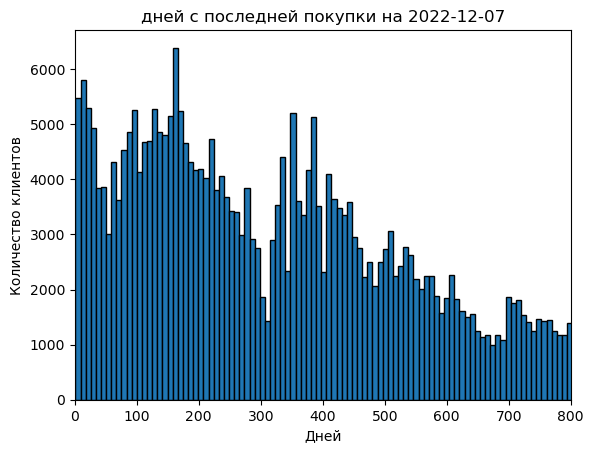

In [20]:
plt.hist(last_per['recency'], edgecolor = 'black',
         bins = 100
        )
plt.title('дней с последней покупки на 2022-12-07')
plt.xlim(0,800)
plt.xlabel('Дней')
plt.ylabel('Количество клиентов')
plt.show()

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 font-size: 120%;
                                                 width:80%;
                                                 margin: auto;
                                                 text-align: left;">
<b>исходя из распределения клиентов построим гипотезу, что </b>
<ul>

<li>клиенты в оттоке - люди, не покупавшие ничего больше 650 дней,
<li>пред-отток - 300-650 дней со зня последней покупки
<li>активные клиенты - 60 - 300 дней
<li>меньше 60 дней - минимальное время между отчетами, считаем клиентов новыми или супер активными

In [21]:
churn = last_per[last_per['recency']>=650].copy()
print('На данный момент в оттоке {} клиентов'.format(churn['actual_id'].count()))#'{} {}'.format('one', 'two')

На данный момент в оттоке 28854 клиентов


In [22]:
pre_churn = last_per[(last_per['recency']>=300) & (last_per['recency']<650)].copy()
print('На данный момент в пред-оттоке {} клиентов'.format(pre_churn['actual_id'].count()))

На данный момент в пред-оттоке 115949 клиентов


In [23]:
best = last_per[last_per['recency']<60].copy()
print('На данный момент недавних и супер-активных {} клиентов'.format(best['actual_id'].count()))

На данный момент недавних и супер-активных 32702 клиентов


In [24]:
for_clust = last_per[(last_per['recency']<300) & (last_per['recency']>=60)]

In [25]:
filtered = pd.concat([df, last_per, last_per]).drop_duplicates(keep=False)
filtered = pd.concat([filtered, prev_per, prev_per]).drop_duplicates(keep=False)

In [26]:
filtered.info()
filtered.tail(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1657700 entries, 0 to 2247571
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   actual_id            1657700 non-null  int64         
 1   period_end           1657700 non-null  datetime64[ns]
 2   num                  1657700 non-null  int64         
 3   revenue_lastyear     1657700 non-null  float64       
 4   quantity_lastyear    1657700 non-null  int64         
 5   orders_lastyear      1657700 non-null  int64         
 6   orders_refund        1657700 non-null  int64         
 7   ratio_not_dh         1657700 non-null  float64       
 8   ratio_online         1657700 non-null  float64       
 9   ratio_refund         1657700 non-null  float64       
 10  avg_ratio_purchase   1657700 non-null  float64       
 11  quantity_1st_period  1657700 non-null  float64       
 12  unigenders           1657700 non-null  int64         
 13  re

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
2247562,998998908989,2021-03-18,2,39686.0,3,3,0,1.0,1.0,0.0,1.0,3.0,0,97,13228.666667
2247563,998998908989,2021-05-18,3,48666.0,4,4,0,1.0,1.0,0.0,1.0,3.0,0,55,12166.500000
2247564,998998908989,2021-07-18,4,57641.0,5,5,0,1.0,1.0,0.0,1.0,3.0,0,46,11528.200000
2247565,998998908989,2021-09-18,5,131294.0,9,8,0,1.0,1.0,0.0,1.0,3.0,0,12,16411.750000
2247566,998998908989,2021-11-18,6,131294.0,9,8,0,1.0,1.0,0.0,1.0,3.0,0,73,16411.750000
2247567,998998908989,2022-01-18,7,91608.0,6,5,0,1.0,1.0,0.0,1.0,3.0,0,134,18321.600000
2247568,998998908989,2022-03-18,8,91608.0,6,5,0,1.0,1.0,0.0,1.0,3.0,0,193,18321.600000
2247569,998998908989,2022-05-18,9,82628.0,5,4,0,1.0,1.0,0.0,1.0,3.0,0,254,20657.000000
2247570,998998908989,2022-07-18,10,87699.0,6,4,0,1.0,1.0,0.0,1.0,3.0,0,61,21924.750000
2247571,998998908989,2022-09-18,11,14046.0,2,1,0,1.0,1.0,0.0,1.0,3.0,0,123,14046.000000


<div style="border-radius:10px; 
            border:#DEB887 solid; 
            padding: 15px; 
            background-color: #FFFAF0; 
            font-size:120%; 
            text-align:left">
    Filtered - датасет для обучения. Из него исключены последний и предпоследний периоды наблюдений. Проведем кластеризацию на нем.

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:100%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Предобработка данных

</div>

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:90%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 
    
## Подготовка числовых признаков

</div>

In [27]:
data = filtered.copy()

In [28]:
# Отсеиваем данные в категориях, выделенных вручную, поставим индексом клиента+дата снятия отчета
data = data.set_index(['actual_id','period_end'])
data = data.drop(['num'], axis = 1) \
        [(data['recency']<300) & (data['recency']>=60)]

In [29]:
#Векторизация численных признаков, исключаем процентные коэффициенты
scalable = data.drop(['ratio_not_dh', 'ratio_online', 'ratio_refund', 'unigenders', 'avg_ratio_purchase'],
                     axis = 1).columns
scaler = StandardScaler()
scaler.fit(data[scalable])
x_train_scaled = pd.DataFrame(scaler.transform(data[scalable]), 
                columns = data.drop(['ratio_not_dh', 'ratio_online', 'ratio_refund', 'unigenders', 'avg_ratio_purchase'],
                axis = 1).columns, index = data.index)
display(x_train_scaled)

revenue_lastyear  quantity_lastyear  orders_lastyear  \
actual_id    period_end                                                         
12013601421  2021-02-19         -0.314251           0.202419        -0.542126   
             2021-04-19         -0.314251           0.202419        -0.542126   
             2021-06-19         -0.314251           0.202419        -0.542126   
12013960666  2022-05-02         -0.049562          -0.312022        -0.542126   
             2022-07-02         -0.049562          -0.312022        -0.542126   
...                                   ...                ...              ...   
998998908989 2022-01-18          1.628417           0.716860         1.676090   
             2022-03-18          1.628417           0.716860         1.676090   
             2022-05-18          1.391673           0.459639         1.121536   
             2022-07-18          1.525362           0.716860         1.121536   
             2022-09-18         -0.416382          -0.312022        -0.542126   

                         orders_refund  quantity_1st_period   recency  \
actual_id    period_end                                                 
12013601421  2021-02-19      -0.244025             0.776257 -0.668023   
             2021-04-19      -0.244025             0.776257  0.325113   
             2021-06-19      -0.244025             0.776257  1.351913   
12013960666  2022-05-02      -0.244025            -0.118650 -0.718521   
             2022-07-02      -0.244025            -0.118650  0.308280   
...                                ...                  ...       ...   
998998908989 2022-01-18      -0.244025             0.328803 -0.482862   
             2022-03-18      -0.244025             0.328803  0.510273   
             2022-05-18      -0.244025             0.328803  1.537074   
             2022-07-18      -0.244025             0.328803 -1.711656   
             2022-09-18      -0.244025             0.328803 -0.668023   

                              aov  
actual_id    period_end            
12013601421  2021-02-19  0.260712  
             2021-04-19  0.260712  
             2021-06-19  0.260712  
12013960666  2022-05-02  1.118196  
             2022-07-02  1.118196  
...                           ...  
998998908989 2022-01-18  0.295011  
             2022-03-18  0.295011  
             2022-05-18  0.494470  
             2022-07-18  0.602745  
             2022-09-18 -0.070154  

[906967 rows x 7 columns]

In [30]:
 data[['ratio_not_dh', 'ratio_online', 'ratio_refund', 'unigenders', 'avg_ratio_purchase']]

ratio_not_dh  ratio_online  ratio_refund  unigenders  \
actual_id    period_end                                                         
12013601421  2021-02-19           1.0           1.0           0.0           0   
             2021-04-19           1.0           1.0           0.0           0   
             2021-06-19           1.0           1.0           0.0           0   
12013960666  2022-05-02           1.0           0.0           0.0           0   
             2022-07-02           1.0           0.0           0.0           0   
...                               ...           ...           ...         ...   
998998908989 2022-01-18           1.0           1.0           0.0           0   
             2022-03-18           1.0           1.0           0.0           0   
             2022-05-18           1.0           1.0           0.0           0   
             2022-07-18           1.0           1.0           0.0           0   
             2022-09-18           1.0           1.0           0.0           0   

                         avg_ratio_purchase  
actual_id    period_end                      
12013601421  2021-02-19                 0.8  
             2021-04-19                 0.8  
             2021-06-19                 0.8  
12013960666  2022-05-02                 1.0  
             2022-07-02                 1.0  
...                                     ...  
998998908989 2022-01-18                 1.0  
             2022-03-18                 1.0  
             2022-05-18                 1.0  
             2022-07-18                 1.0  
             2022-09-18                 1.0  

[906967 rows x 5 columns]

In [31]:
# объединяем признаки
x_train_full = pd.concat((x_train_scaled, 
                               data[['ratio_not_dh', 'ratio_online', 'ratio_refund', 'unigenders', 'avg_ratio_purchase']]), 
                              axis=1)
display(x_train_full.head())

revenue_lastyear  quantity_lastyear  orders_lastyear  \
actual_id   period_end                                                         
12013601421 2021-02-19         -0.314251           0.202419        -0.542126   
            2021-04-19         -0.314251           0.202419        -0.542126   
            2021-06-19         -0.314251           0.202419        -0.542126   
12013960666 2022-05-02         -0.049562          -0.312022        -0.542126   
            2022-07-02         -0.049562          -0.312022        -0.542126   

                        orders_refund  quantity_1st_period   recency  \
actual_id   period_end                                                 
12013601421 2021-02-19      -0.244025             0.776257 -0.668023   
            2021-04-19      -0.244025             0.776257  0.325113   
            2021-06-19      -0.244025             0.776257  1.351913   
12013960666 2022-05-02      -0.244025            -0.118650 -0.718521   
            2022-07-02      -0.244025            -0.118650  0.308280   

                             aov  ratio_not_dh  ratio_online  ratio_refund  \
actual_id   period_end                                                       
12013601421 2021-02-19  0.260712           1.0           1.0           0.0   
            2021-04-19  0.260712           1.0           1.0           0.0   
            2021-06-19  0.260712           1.0           1.0           0.0   
12013960666 2022-05-02  1.118196           1.0           0.0           0.0   
            2022-07-02  1.118196           1.0           0.0           0.0   

                        unigenders  avg_ratio_purchase  
actual_id   period_end                                  
12013601421 2021-02-19           0                 0.8  
            2021-04-19           0                 0.8  
            2021-06-19           0                 0.8  
12013960666 2022-05-02           0                 1.0  
            2022-07-02           0                 1.0

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 font-size: 120%;
                                                 width:80%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Промежуточные итоги: </b>
<ul>
<li> Провели масштабирование
<li> создали таблицу с признаками
<ul>

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:100%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Обучение модели K-mean

In [32]:
distortion = []
K = range(1, 21)
for k in K:
    model = KMeans(n_clusters=k, random_state=123, n_init = 'auto')
    model.fit(x_train_full)
    distortion.append(model.inertia_) 

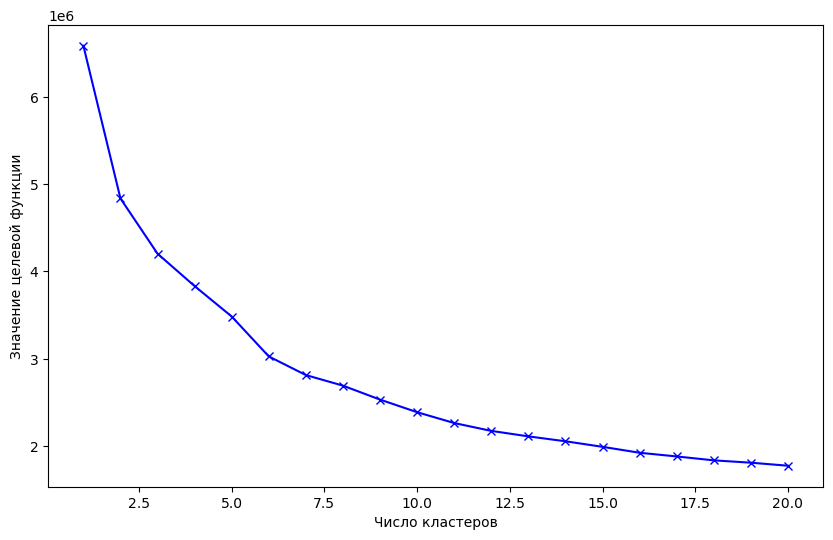

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show() 

<div style="border-radius:10px; 
            border:#DEB887 solid; 
            padding: 15px; 
            background-color: #FFFAF0; 
            font-size:120%; 
            text-align:left"> 
По методу локтя остановимся на 6 кластерах,  вдобавок к ним будет еще 4 выделенных вручную категории. Здесь можно сдвинуться в обе стороны, но увеличивать количество категорий выше 10 не представляется целесообразным. 

In [34]:
model = KMeans(n_clusters=6, random_state=123, n_init = 'auto')
model.fit(x_train_full)
model.inertia_

3024374.2773449062

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:90%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 
    
# Опишем центроиды

</div>

In [35]:
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)

In [36]:
scaler_inv = scaler.inverse_transform(centroids[scalable], copy=None)

In [37]:
scaler_inv = pd.DataFrame(scaler.inverse_transform(centroids[scalable]), 
                columns = data.drop(['ratio_not_dh', 'ratio_online', 'ratio_refund', 'unigenders', 'avg_ratio_purchase'],
                axis = 1).columns)

In [38]:
scaler_inv

,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,quantity_1st_period,recency,aov
0,15022.750405,1.740248,1.308063,5.650404e-06,2.819905,163.339499,26242.282056
1,34482.843749,3.494313,2.487419,1.209298e+00,4.025507,164.594068,25907.201328
2,80066.829698,9.092171,4.917260,9.823073e-02,2.925905,168.884879,25810.350663
3,57139.015011,4.302384,1.433876,3.094418e-02,2.700693,164.881403,26234.028695
4,229264.198375,24.141132,10.233591,1.302691e+00,3.374207,176.568169,25477.236290
5,18985.383768,2.243729,1.662271,2.481348e-14,2.817813,163.805333,26173.436230


In [39]:
centroids = pd.concat(
    [scaler_inv, centroids[['ratio_not_dh', 'ratio_online', 'ratio_refund', 'unigenders', 'avg_ratio_purchase']]],
    axis=1)
centroids['cluster_name'] = ['small', 'middle', 'super' , 'big', 'top', 'minor' ]

In [40]:
centroids.round(1).sort_values('revenue_lastyear')

,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,quantity_1st_period,recency,aov,ratio_not_dh,ratio_online,ratio_refund,unigenders,avg_ratio_purchase,cluster_name
0,15022.8,1.7,1.3,0.0,2.8,163.3,26242.3,-0.3,0.9,-0.3,0.0,1.0,small
5,18985.4,2.2,1.7,0.0,2.8,163.8,26173.4,-0.2,-0.8,-0.3,0.0,1.0,minor
1,34482.8,3.5,2.5,1.2,4.0,164.6,25907.2,0.0,-0.0,-0.0,0.6,0.9,middle
3,57139.0,4.3,1.4,0.0,2.7,164.9,26234.0,0.7,0.2,2.3,0.0,1.0,big
2,80066.8,9.1,4.9,0.1,2.9,168.9,25810.4,1.1,-0.7,0.2,0.0,1.0,super
4,229264.2,24.1,10.2,1.3,3.4,176.6,25477.2,3.5,-0.9,1.1,0.1,1.0,top


<div style="border-radius:10px; 
            border:#DEB887 solid; 
            padding: 15px; 
            background-color: #FFFAF0; 
            font-size:120%; 
            text-align:left"> 

<b>Судя по описанию центроидов, основными признаками стали:</b>
<ul>
          <li> Доходность клиента
          <li> Количество заказанных позиций за последний год
<li> топовые клиенты делали в среднем 10 заказов из 24 позиций за прошедший год и тратили около 200 тысяч

              
</ul>

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:100%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Проведем кластеризацию данных за последний период

In [41]:
# Проведем масштабирование численных признаков
data_last_per = for_clust.set_index(['actual_id','period_end'])
data_last_per = data_last_per.drop(['num'], axis = 1)
x_last_per_scaled = pd.DataFrame(scaler.transform(data_last_per[scalable]), 
    columns = data_last_per.drop(['ratio_not_dh', 'ratio_online', 'ratio_refund', 'unigenders', 'avg_ratio_purchase'],
    axis = 1).columns, index = data_last_per.index)
display(x_last_per_scaled)

,,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,quantity_1st_period,recency,aov
actual_id,period_end,,,,,,,
2977,2022-12-07,-0.523576,-0.569243,-0.542126,2.003793,-0.566104,1.335081,-0.417418
79021,2022-12-07,-0.441243,-0.312022,-0.542126,-0.244025,-0.118650,-0.449196,-0.150693
79111,2022-12-07,-0.125910,0.459639,1.676090,2.003793,-0.566104,0.190450,-0.841650
79211,2022-12-07,-0.602666,-0.569243,-0.542126,-0.244025,-0.566104,0.291447,-0.673638
79311,2022-12-07,0.766649,0.202419,-0.542126,-0.244025,0.776257,0.055788,3.762389
...,...,...,...,...,...,...,...,...
375979164475413,2022-12-07,-0.382031,-0.054802,-0.542126,-0.244025,0.328803,1.082589,0.041131
2970032485050994,2022-12-07,-0.549940,-0.569243,-0.542126,-0.244025,-0.566104,0.527106,-0.502825
2978988666666960,2022-12-07,-0.694938,-0.569243,-0.542126,-0.244025,-0.566104,0.745933,-0.972562


In [42]:
# объединим признаки
x_last_per_full = pd.concat((x_last_per_scaled, 
    data_last_per[['ratio_not_dh', 'ratio_online', 'ratio_refund', 'unigenders', 'avg_ratio_purchase']]), 
    axis=1)
display(x_last_per_full.head())

,,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,quantity_1st_period,recency,aov,ratio_not_dh,ratio_online,ratio_refund,unigenders,avg_ratio_purchase
actual_id,period_end,,,,,,,,,,,,
2977,2022-12-07,-0.523576,-0.569243,-0.542126,2.003793,-0.566104,1.335081,-0.417418,1.0,1.0,1.0,0,1.0
79021,2022-12-07,-0.441243,-0.312022,-0.542126,-0.244025,-0.118650,-0.449196,-0.150693,1.0,0.0,0.0,0,1.0
79111,2022-12-07,-0.125910,0.459639,1.676090,2.003793,-0.566104,0.190450,-0.841650,1.0,0.0,0.2,0,1.0
79211,2022-12-07,-0.602666,-0.569243,-0.542126,-0.244025,-0.566104,0.291447,-0.673638,1.0,0.0,0.0,0,1.0
79311,2022-12-07,0.766649,0.202419,-0.542126,-0.244025,0.776257,0.055788,3.762389,1.0,0.0,0.0,0,1.0


In [43]:
last_per_clustered = pd.DataFrame(model.predict(x_last_per_full))

In [44]:
last_per_clustered = pd.DataFrame(model.predict(x_last_per_full), 
                columns = ['cluster'], 
                                  index = x_last_per_full.index
                                 )
# дадим названия кластерам-категориям
last_per_clustered['cluster_name'] = last_per_clustered['cluster'].apply( lambda x: 
                                    'big' if x ==3
                                     else 'top' if x ==4 
                                    else 'super' if x ==2
                                    else'minor' if x ==5
                                    else'small' if x ==0
                                    else 'middle' 
                                     )
display(last_per_clustered)

,,cluster,cluster_name
actual_id,period_end,,
2977,2022-12-07,1,middle
79021,2022-12-07,5,minor
79111,2022-12-07,1,middle
79211,2022-12-07,0,small
79311,2022-12-07,3,big
...,...,...,...
375979164475413,2022-12-07,0,small
2970032485050994,2022-12-07,0,small
2978988666666960,2022-12-07,0,small


<div style="border-radius:10px; 
            border:#DEB887 solid; 
            padding: 15px; 
            background-color: #FFFAF0; 
            font-size:120%; 
            text-align:left"> 
<ul>
<li>Провели кластеризацию активных клиентов на последний период
<li>Добавим к ним отделенных вручную активных клиентов, клиентов в оттоке и в предоттоке
    </ul>

In [45]:
churn= churn.set_index(['actual_id','period_end'])
pre_churn = pre_churn.set_index(['actual_id','period_end'])
best = best.set_index(['actual_id','period_end'])

In [46]:
churn.loc[ :,'cluster'] = 6
churn.loc[ :,'cluster_name'] = 'churn'
pre_churn.loc[ :,'cluster'] = 7
pre_churn.loc[ :,'cluster_name'] = 'pre_churn'
best.loc[ :,'cluster'] = 8
best.loc[ :,'cluster_name'] = 'best'

In [47]:
last_per_clustered_full = pd.concat([last_per_clustered[['cluster','cluster_name']], 
                                     churn[['cluster','cluster_name']],
                                     pre_churn[['cluster','cluster_name']],
                                     best[['cluster','cluster_name']]
                                    ],
                                    axis=0)

In [48]:
last_per_clustered_full

,,cluster,cluster_name
actual_id,period_end,,
2977,2022-12-07,1,middle
79021,2022-12-07,5,minor
79111,2022-12-07,1,middle
79211,2022-12-07,0,small
79311,2022-12-07,3,big
...,...,...,...
996557320002,2022-12-07,8,best
2558912232866,2022-12-07,8,best
3752988828777,2022-12-07,8,best


<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:100%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Проведем кластеризацию данных за предпоследний период и оценим переход между категориями

In [49]:
prev_per

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
0,12013601421,2022-10-19,12,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,0,730,0.0
1,12013960666,2022-11-02,5,27960.0,2,1,0,1.0,0.0,0.0,1.0,2.0,0,304,27960.0
2,12019257700,2022-11-19,6,27900.0,5,1,0,1.0,0.0,0.0,1.0,5.0,0,365,27900.0
3,12019824362,2022-10-28,9,0.0,0,0,0,0.0,0.0,0.0,1.0,1.0,0,546,0.0
4,12026154577,2022-11-22,12,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,0,730,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287750,998978080802,2022-11-19,8,0.0,0,0,0,0.0,0.0,0.0,1.0,3.0,0,488,0.0
287751,998990901001,2022-11-14,5,17960.0,2,2,0,1.0,0.0,0.0,1.0,2.0,0,304,8980.0
287752,998997770110,2022-11-23,9,0.0,0,0,0,0.0,0.0,0.0,1.0,1.0,0,549,0.0
287753,998998810088,2022-10-23,5,68900.0,5,2,0,1.0,0.0,0.0,1.0,5.0,0,255,34450.0


In [50]:
data_prev_per = prev_per.set_index(['actual_id','period_end'])
data_prev_per = data_prev_per.drop(['num'], axis = 1) \
        [(data_prev_per['recency']<300) & (data_prev_per['recency']>=60)]
x_prev_per_scaled = pd.DataFrame(scaler.transform(data_prev_per[scalable]), 
    columns = data_prev_per.drop(
        ['ratio_not_dh', 'ratio_online', 'ratio_refund', 'unigenders', 'avg_ratio_purchase'],
    axis = 1).columns, index = data_prev_per.index)
display(x_prev_per_scaled)

,,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,quantity_1st_period,recency,aov
actual_id,period_end,,,,,,,
12063704219,2022-10-09,0.221349,0.202419,0.012428,2.003793,0.328803,1.755901,0.363029
12068234221,2022-10-28,-0.392286,-0.312022,0.012428,-0.244025,-0.118650,2.260885,-0.630935
12124564545,2022-10-18,-0.365396,-0.569243,-0.542126,-0.244025,-0.566104,1.335081,0.095023
12321323213,2022-11-19,-0.629030,-0.569243,-0.542126,-0.244025,-0.566104,0.358778,-0.759045
13109759363,2022-10-22,-0.365923,-0.312022,0.012428,-0.244025,-0.118650,1.318248,-0.588231
...,...,...,...,...,...,...,...,...
998909710053,2022-11-30,0.503015,0.202419,-0.542126,-0.244025,0.776257,0.341945,2.908322
998933934627,2022-11-08,1.974085,1.745742,1.121536,-0.244025,2.566071,1.991560,0.966165
998946649278,2022-11-28,-0.259942,-0.569243,-0.542126,-0.244025,-0.566104,1.385579,0.436650


In [51]:
x_prev_per_full = pd.concat((x_prev_per_scaled, 
    data_prev_per[['ratio_not_dh', 'ratio_online', 'ratio_refund', 'unigenders', 'avg_ratio_purchase']]), 
    axis=1)
display(x_prev_per_full.head())

,,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,quantity_1st_period,recency,aov,ratio_not_dh,ratio_online,ratio_refund,unigenders,avg_ratio_purchase
actual_id,period_end,,,,,,,,,,,,
12063704219,2022-10-09,0.221349,0.202419,0.012428,2.003793,0.328803,1.755901,0.363029,1.000000,1.0,0.5,0,1.0
12068234221,2022-10-28,-0.392286,-0.312022,0.012428,-0.244025,-0.118650,2.260885,-0.630935,0.624374,1.0,0.0,0,1.0
12124564545,2022-10-18,-0.365396,-0.569243,-0.542126,-0.244025,-0.566104,1.335081,0.095023,1.000000,1.0,0.0,0,1.0
12321323213,2022-11-19,-0.629030,-0.569243,-0.542126,-0.244025,-0.566104,0.358778,-0.759045,1.000000,1.0,0.0,0,1.0
13109759363,2022-10-22,-0.365923,-0.312022,0.012428,-0.244025,-0.118650,1.318248,-0.588231,1.000000,0.0,0.0,0,1.0


In [52]:
prev_per_clustered = pd.DataFrame(model.predict(x_prev_per_full), 
                columns = ['cluster'], 
                                  index = x_prev_per_full.index
                                 )
prev_per_clustered['cluster_name'] = prev_per_clustered['cluster'].apply( lambda x: 
                                    'big' if x ==3
                                     else 'top' if x ==4 
                                    else 'super' if x ==2
                                    else'minor' if x ==5
                                    else'small' if x ==0
                                    else 'middle' 
                                     )
display(prev_per_clustered)

,,cluster,cluster_name
actual_id,period_end,,
12063704219,2022-10-09,1,middle
12068234221,2022-10-28,0,small
12124564545,2022-10-18,0,small
12321323213,2022-11-19,0,small
13109759363,2022-10-22,0,small
...,...,...,...
998909710053,2022-11-30,3,big
998933934627,2022-11-08,2,super
998946649278,2022-11-28,0,small


In [53]:
churn = prev_per[prev_per['recency']>=650].copy()
pre_churn = prev_per[(prev_per['recency']>=300) & (prev_per['recency']<650)].copy()
best = prev_per[prev_per['recency']<60].copy()

In [54]:
churn= churn.set_index(['actual_id','period_end'])
pre_churn = pre_churn.set_index(['actual_id','period_end'])
best = best.set_index(['actual_id','period_end'])

In [55]:
churn.loc[ :,'cluster'] = 6
churn.loc[ :,'cluster_name'] = 'churn'
pre_churn.loc[ :,'cluster'] = 7
pre_churn.loc[ :,'cluster_name'] = 'pre_churn'
best.loc[ :,'cluster'] = 8
best.loc[ :,'cluster_name'] = 'best'

In [56]:
prev_per_clustered_full = pd.concat([prev_per_clustered[['cluster','cluster_name']], 
                                     churn[['cluster','cluster_name']],
                                     pre_churn[['cluster','cluster_name']],
                                     best[['cluster','cluster_name']]
                                    ],
                                    axis=0)

In [57]:
prev_per_clustered_full

,,cluster,cluster_name
actual_id,period_end,,
12063704219,2022-10-09,1,middle
12068234221,2022-10-28,0,small
12124564545,2022-10-18,0,small
12321323213,2022-11-19,0,small
13109759363,2022-10-22,0,small
...,...,...,...
971553172377,2022-10-19,8,best
9858717446,2022-11-28,8,best
995593857788,2022-10-11,8,best


In [58]:
prev_per_clustered_full['cluster_name'].unique()

array(['middle', 'small', 'top', 'big', 'super', 'minor', 'churn',
       'pre_churn', 'best'], dtype=object)

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:100%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Сравним категории клиентов в последний и предыдущий периоды

In [59]:
prev_per_clustered_full

,,cluster,cluster_name
actual_id,period_end,,
12063704219,2022-10-09,1,middle
12068234221,2022-10-28,0,small
12124564545,2022-10-18,0,small
12321323213,2022-11-19,0,small
13109759363,2022-10-22,0,small
...,...,...,...
971553172377,2022-10-19,8,best
9858717446,2022-11-28,8,best
995593857788,2022-10-11,8,best


In [60]:
last_per_clustered_full

,,cluster,cluster_name
actual_id,period_end,,
2977,2022-12-07,1,middle
79021,2022-12-07,5,minor
79111,2022-12-07,1,middle
79211,2022-12-07,0,small
79311,2022-12-07,3,big
...,...,...,...
996557320002,2022-12-07,8,best
2558912232866,2022-12-07,8,best
3752988828777,2022-12-07,8,best


In [61]:
two_per = pd.merge(prev_per_clustered_full, last_per_clustered_full, on=['actual_id'], how = 'outer')
two_per.columns = ['cluster_prev', 'cluster_name_prev', 'cluster_last', 'cluster_name_last']
two_per['transition'] = 'no'

In [62]:
for i in two_per.index:
    if pd.isna(two_per.loc[i,'cluster_prev']):
        two_per.loc[i,'cluster_last'] = 9
        two_per.loc[i,'cluster_name_last'] = 'new'
    if two_per.loc[i,'cluster_name_prev'] != two_per.loc[i,'cluster_name_last']:
        two_per.loc[i, 'transition'] = \
        'from {} to {}'.format(two_per.loc[i,'cluster_name_prev'],\
                               two_per.loc[i,'cluster_name_last'])

In [63]:
two_per

,cluster_prev,cluster_name_prev,cluster_last,cluster_name_last,transition
actual_id,,,,,
12063704219,1.0,middle,7,pre_churn,from middle to pre_churn
12068234221,0.0,small,7,pre_churn,from small to pre_churn
12124564545,0.0,small,0,small,no
12321323213,0.0,small,0,small,no
13109759363,0.0,small,0,small,no
...,...,...,...,...,...
79999199990,NaN,NaN,9,new,from nan to new
79999830693,NaN,NaN,9,new,from nan to new
79999955629,NaN,NaN,9,new,from nan to new


In [64]:
two_per.groupby(['transition']).count().sort_values('cluster_last', ascending = False)

,cluster_prev,cluster_name_prev,cluster_last,cluster_name_last
transition,,,,
no,244042,244042,244042,244042
from nan to new,0,0,14364,14364
from minor to small,11347,11347,11347,11347
from best to minor,5196,5196,5196,5196
from small to pre_churn,3829,3829,3829,3829
from best to super,3081,3081,3081,3081
from pre_churn to churn,2829,2829,2829,2829
from pre_churn to best,2444,2444,2444,2444
from minor to best,2402,2402,2402,2402


In [65]:
two_per.groupby(['cluster_name_last']).count().sort_values('cluster_last', ascending = False)

,cluster_prev,cluster_name_prev,cluster_last,transition
cluster_name_last,,,,
pre_churn,115949,115949,115949,115949
small,51815,51815,51815,51815
minor,32642,32642,32642,32642
best,30955,30955,30955,30955
churn,28854,28854,28854,28854
new,0,0,14364,14364
super,11774,11774,11774,11774
big,7607,7607,7607,7607
middle,6534,6534,6534,6534


<div style="border-radius:10px; 
            border:#DEB887 solid; 
            padding: 15px; 
            background-color: #FFFAF0; 
            font-size:120%; 
            text-align:left"> 
<ul>
<li> В переменной two_per хранятся данные о всех клиентах и их кластере на данный момент и в предыдущий отчетный период.
<li> на Декабрь 2022 в оттоке 28854 клиентов
<li> в пред-оттоке 115949
<li> Новых клиентов 14364
<li> 7607 топовых клиенты делали в среднем 10 заказов из 24 позиций за прошедший год и потратили около 200 тысяч
<li> Большинство клиентов не сменило категории. Самый большой переток произошел из средних в малые клиенты.    

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:100%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Заключение

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:120%; text-align:left">
<br> ⚡️ <b>Проведена кластеризация клиентов фешн-рителйера для  оценки состояния базы. Выделены кластеры, составлено описание топовых клиентов. Данные так же подходят для повышения эффективности рекламных компаний.</b> 
        
        
<br><b> Входные данные - данные о клиентах компании за 2 года с отчетным периодом 2 месяца </b>

<br> ⚡️ Проведены анализ и предобработка данных

<br> ⚡️ Выделены клиенты в оттоке и пред-оттоке
        
<br> ⚡️ Обучены модель кластеризации K-Means
    
<br> ⚡️ Обученная модель находится в переменной **model**
        
<br> ⚡ Список клиентов с категориями и перетоками содержится в переменной **two_per** 

<br> <b>⚡ Ответы на поставленные в задаче вопросы:</b>
    <ul>
<li> на Декабрь 2022 в оттоке 28854 клиентов
<li> в пред-оттоке 115949
<li> 1625 топовых клиентов на последний отчетный период в среднем 
    <br> за прошедший год тратили около 235 тысяч,
    <br> за прошедний год разместили 11,5 заказов из 24 позиций 
    <br> за прошедший год возвращяли 1.4(13%) заказа, 
    <br> 36% топовых пользователей заказывают товары для обоих полов
    <br> <b>Пользуются сервисом 20 месяцев </b>
    <br> В первый период купили в 8,3 позиции
    <br> Последнюю покупку совершали 110 дней назад
    
<li> Большинство клиентов не сменило категории. Самый большой переток произошел из средних в малые клиенты.    
<li> Новых клиентов 14364
    
  <br>  <br>  
    
<b>Александр Син  </b>
<br>89140934788
<br>https://t.me/AlxdrSiN 


<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:100%;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Опишем кластеры

In [66]:
top_id = two_per[two_per['cluster_name_last'] =='top'].index

In [67]:
top_last_per = df[(df['actual_id'].isin(top_id)) & (df['period_end'] == '2022-12-07')]

In [68]:
display(top_last_per.describe())

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
count,1.625000e+03,1625,1625.000000,1.625000e+03,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,7.921363e+10,2022-12-07 00:00:00,10.076923,2.350049e+05,24.115692,11.502769,1.434462,0.968097,0.540739,0.128516,0.881867,8.311385,0.361846,110.204923,26130.368580
min,7.981100e+04,2022-12-07 00:00:00,3.000000,1.790000e+04,4.000000,1.000000,0.000000,0.556233,0.000000,0.000000,0.000000,1.000000,0.000000,60.000000,4019.680000
25%,7.913679e+10,2022-12-07 00:00:00,7.000000,1.584230e+05,17.000000,8.000000,0.000000,0.962337,0.222222,0.000000,0.814286,3.000000,0.000000,76.000000,13446.153846
50%,7.921402e+10,2022-12-07 00:00:00,11.000000,2.066800e+05,21.000000,10.000000,1.000000,1.000000,0.571429,0.062500,1.000000,6.000000,0.000000,95.000000,19610.500000
75%,7.951906e+10,2022-12-07 00:00:00,13.000000,2.725600e+05,27.000000,14.000000,2.000000,1.000000,0.875000,0.200000,1.000000,11.000000,1.000000,134.000000,30995.571429
max,3.752932e+11,2022-12-07 00:00:00,14.000000,1.494150e+06,164.000000,145.000000,21.000000,1.000000,1.000000,1.000000,1.000000,138.000000,1.000000,295.000000,275540.000000
std,8.522542e+09,NaN,3.533564,1.241220e+05,11.877719,6.776073,2.176236,0.059766,0.352906,0.181884,0.192205,9.045331,0.480683,46.060778,22816.119961


In [69]:
print('Средние показатели для покупателей категории топ в последнем отчете')
display(top_last_per.mean())

Средние показатели для покупателей категории топ в последнем отчете


actual_id               79213628644.680618
period_end             2022-12-07 00:00:00
num                              10.076923
revenue_lastyear             235004.875123
quantity_lastyear                24.115692
orders_lastyear                  11.502769
orders_refund                     1.434462
ratio_not_dh                      0.968097
ratio_online                      0.540739
ratio_refund                      0.128516
avg_ratio_purchase                0.881867
quantity_1st_period               8.311385
unigenders                        0.361846
recency                         110.204923
aov                            26130.36858
dtype: object

In [96]:
cat_mean_stats = pd.DataFrame(columns = ['pre_churn', 'small', 'top', 'big', 'minor', 'middle', 'best',
       'super', 'churn', 'new'])
for i in two_per['cluster_name_last'].unique():
#    print(i, 'категория')
#    display(df[(df['actual_id'].isin(
#        two_per[two_per['cluster_name_last'] ==i].index)) & (df['period_end'] == '2022-12-07')].mean())
    cat_mean = (df[(df['actual_id'].isin(
        two_per[two_per['cluster_name_last'] ==i].index)) & (df['period_end'] == '2022-12-07')].mean())
    cat_mean_stats[i] = cat_mean

In [94]:
display(cat_mean_stats.sort_values('revenue_lastyear', axis = 1, ascending=False).drop(['actual_id', 'period_end']))

,top,best,super,big,middle,new,minor,small,pre_churn,churn
num,10.076923,9.563754,9.14617,7.30301,7.921182,2.0,7.092549,6.708,9.028047,12.742185
revenue_lastyear,235004.875123,110886.617657,78429.932476,58556.532382,36154.126219,29320.17587,19378.595223,14276.103912,3483.214262,0.0
quantity_lastyear,24.115692,9.72292,9.08901,4.74392,4.019896,2.249165,2.448961,1.843559,0.38579,0.0
orders_lastyear,11.502769,5.720724,5.094955,1.456159,2.863942,1.4033,1.804638,1.327839,0.262365,0.0
orders_refund,1.434462,0.438314,0.099626,0.027212,1.261249,0.050752,0.0,0.000058,0.01881,0.0
ratio_not_dh,0.968097,0.970848,0.974639,0.994991,0.94423,0.976438,0.960246,0.992216,0.199496,0.0
ratio_online,0.540739,0.341608,0.328563,0.179946,0.77503,0.194619,0.225005,0.220611,0.113995,0.016254
ratio_refund,0.128516,0.05052,0.016875,0.019631,0.563296,0.029451,0.0,0.000058,0.014282,0.0
avg_ratio_purchase,0.881867,0.930184,0.920848,0.969739,0.935313,0.979269,0.962327,0.967872,0.982146,0.994767
quantity_1st_period,8.311385,3.314683,4.555461,3.883002,2.370217,2.092175,1.893481,1.783113,1.9363,1.707389


<div style="border-radius:10px; 
            border:#DEB887 solid; 
            padding: 15px; 
            background-color: #FFFAF0; 
            font-size:120%; 
            text-align:left"> 
<ul> Выше представлены средние показатели по категориям, помимо уже описанных, есть несколько выраженных тенденций:
<li> Если люди покупают вещи для обоих полов, они более вероятно станут клиентами высокой категории
<li> Покупатели категорий top и middle чаше совершают покупки онлайн и чаще совершают возвраты
<li> Средний чек по выкупленных за год заказм (aov) в норме уменьшается при понижении категории, за исключением клиентов категории big    

In [114]:
cat_mean_stats.loc['num']

pre_churn     9.028047
small            6.708
top          10.076923
big            7.30301
minor         7.092549
middle        7.921182
best          9.563754
super          9.14617
churn        12.742185
new                2.0
Name: num, dtype: object

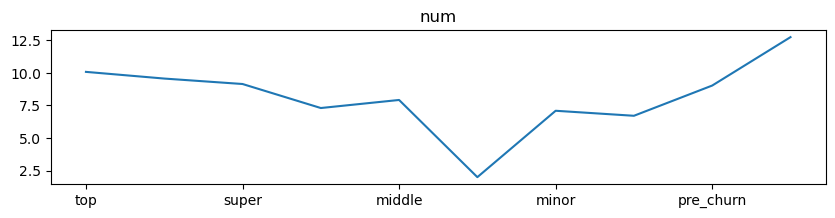

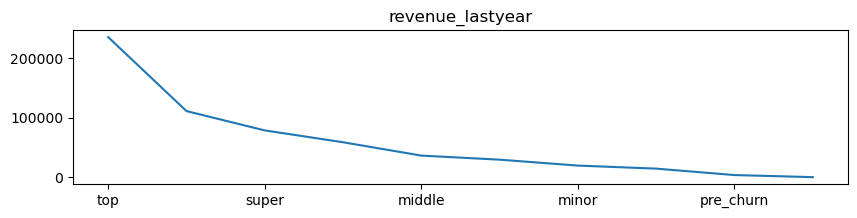

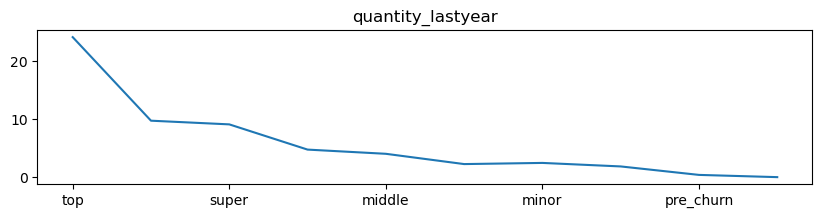

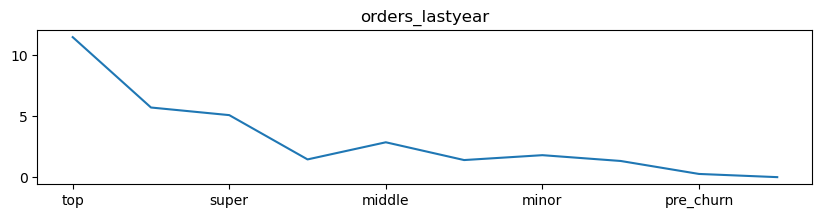

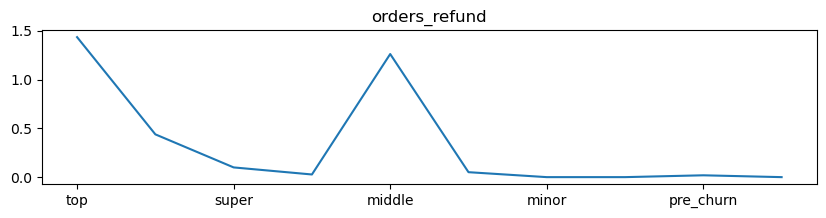

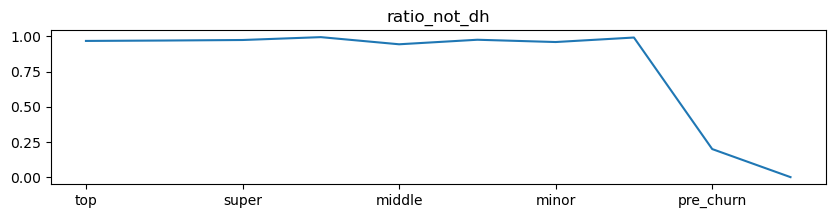

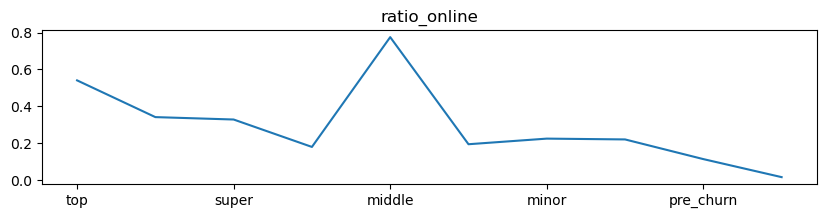

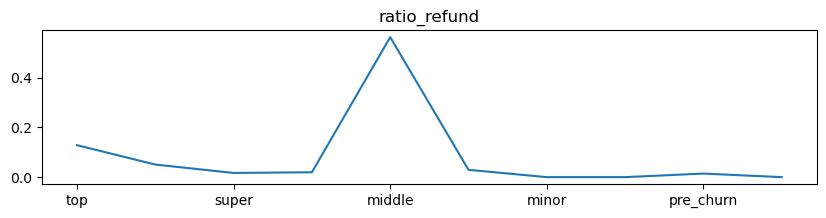

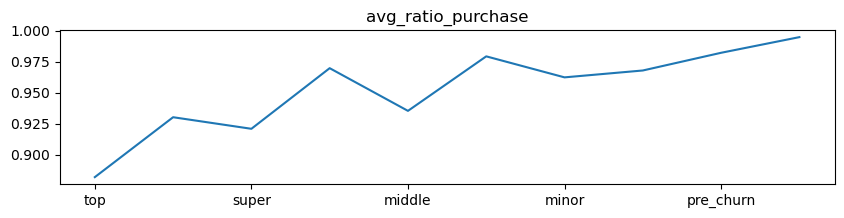

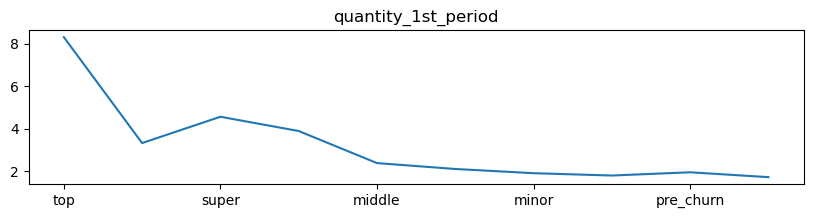

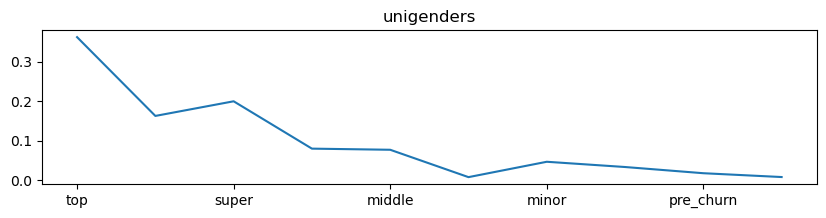

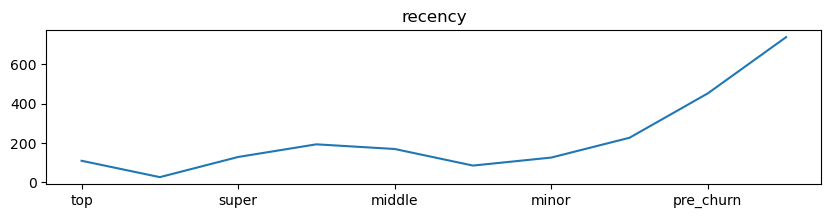

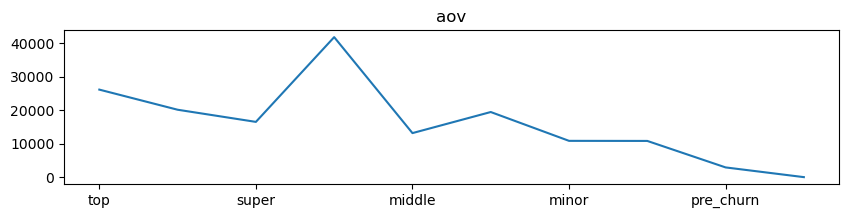

In [144]:
for i in cat_mean_stats.drop(['actual_id', 'period_end']).index:
    plt.figure(figsize=(10,2)) 
    plt.title(i)
    #plt.xticks(ticks = cat_mean_stats.sort_values('revenue_lastyear', axis = 1, ascending=False).columns)
    cat_mean_stats.sort_values('revenue_lastyear', axis = 1, ascending=False).loc[i].plot()
    
    plt.show()